In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

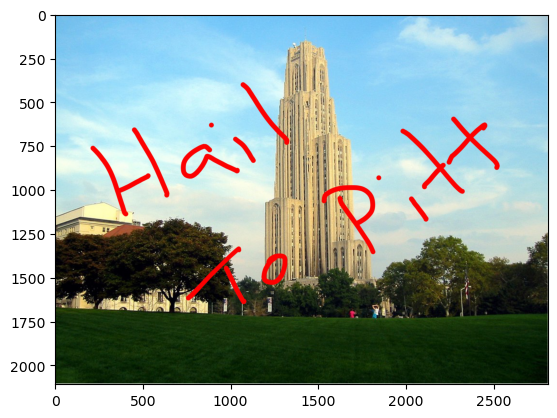

In [2]:
img = cv2.imread(os.path.relpath('../../Data/Hail_to_Pitt.jpg'))
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

Text(0.5, 1.0, 'Masked image')

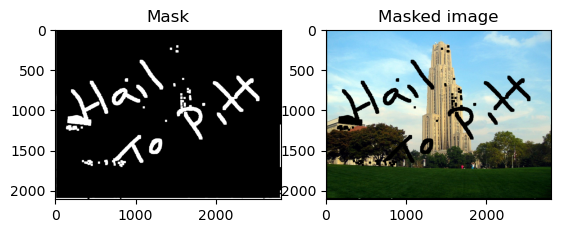

In [3]:
# First we have to find a mask from the artifact

_,mask = cv2.threshold(img[:,:,0],253,255,cv2.THRESH_BINARY)

mask = cv2.medianBlur(mask,7)

kernel = np.ones((25,25),np.uint8)
mask_dilated = cv2.dilate(mask,kernel)

# We have to make sure our mask completely covers the area to fix or else, 
# the artifact will be smeared back in by the inpainting

lst=np.where(mask_dilated==255)
img2=img.copy()
for idx in range(0,len(lst[0])):
    img2[lst[0][idx],lst[1][idx],:]=0


plt.subplot(121); plt.imshow(mask_dilated,cmap='gray'); plt.title('Mask')
plt.subplot(122); plt.imshow(img2); plt.title('Masked image')


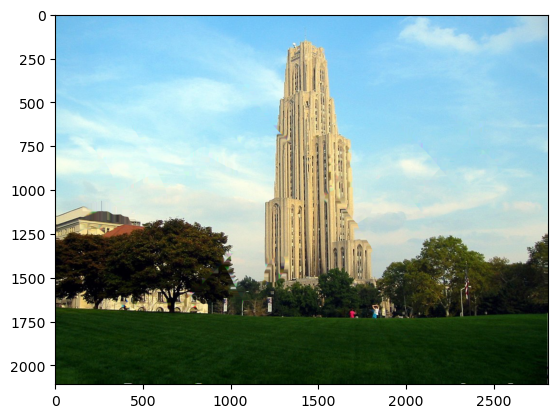

In [4]:
# INPAINT_NS  - Use Navier-Stokes based method.
# INPAINT_TELEA  -Use the algorithm proposed by Alexandru Telea
dst = cv2.inpaint(img,mask_dilated,1,cv2.INPAINT_NS)

plt.imshow(dst)